<a href="https://colab.research.google.com/github/benpardede/Wrangling-Project/blob/main/Wrangling_Olist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Extract Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
path = '/content/gdrive/MyDrive/SQL & Wrangling Project/olist.db'

In [ ]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
con = sqlite3.connect('/content/gdrive/MyDrive/SQL & Wrangling Project/olist.db')

In [ ]:
tab = pd.read_sql("SELECT name FROM sqlite_master WHERE type = 'table'", con)
tab

,name
0,olist_order_customer_dataset
1,olist_order_dataset
2,olist_order_reviews_dataset
3,olist_order_payments_dataset
4,olist_order_items_dataset
5,olist_products_dataset
6,olist_sellers_dataset
7,olist_geolocation_dataset
8,product_category_name_translation


## **OBJECTIVE**
1. Perusahaan ingin mengetahui Top 10 Produk yang menghasilkan revenue tertinggi
2. Perusahaan ingin melihat total penjualan dari tiap kategori product
3. Perusahaan menginginkan informasi pertumbuhan pemesanan produk dari 10 produk yang paling diminati

# **ERD**

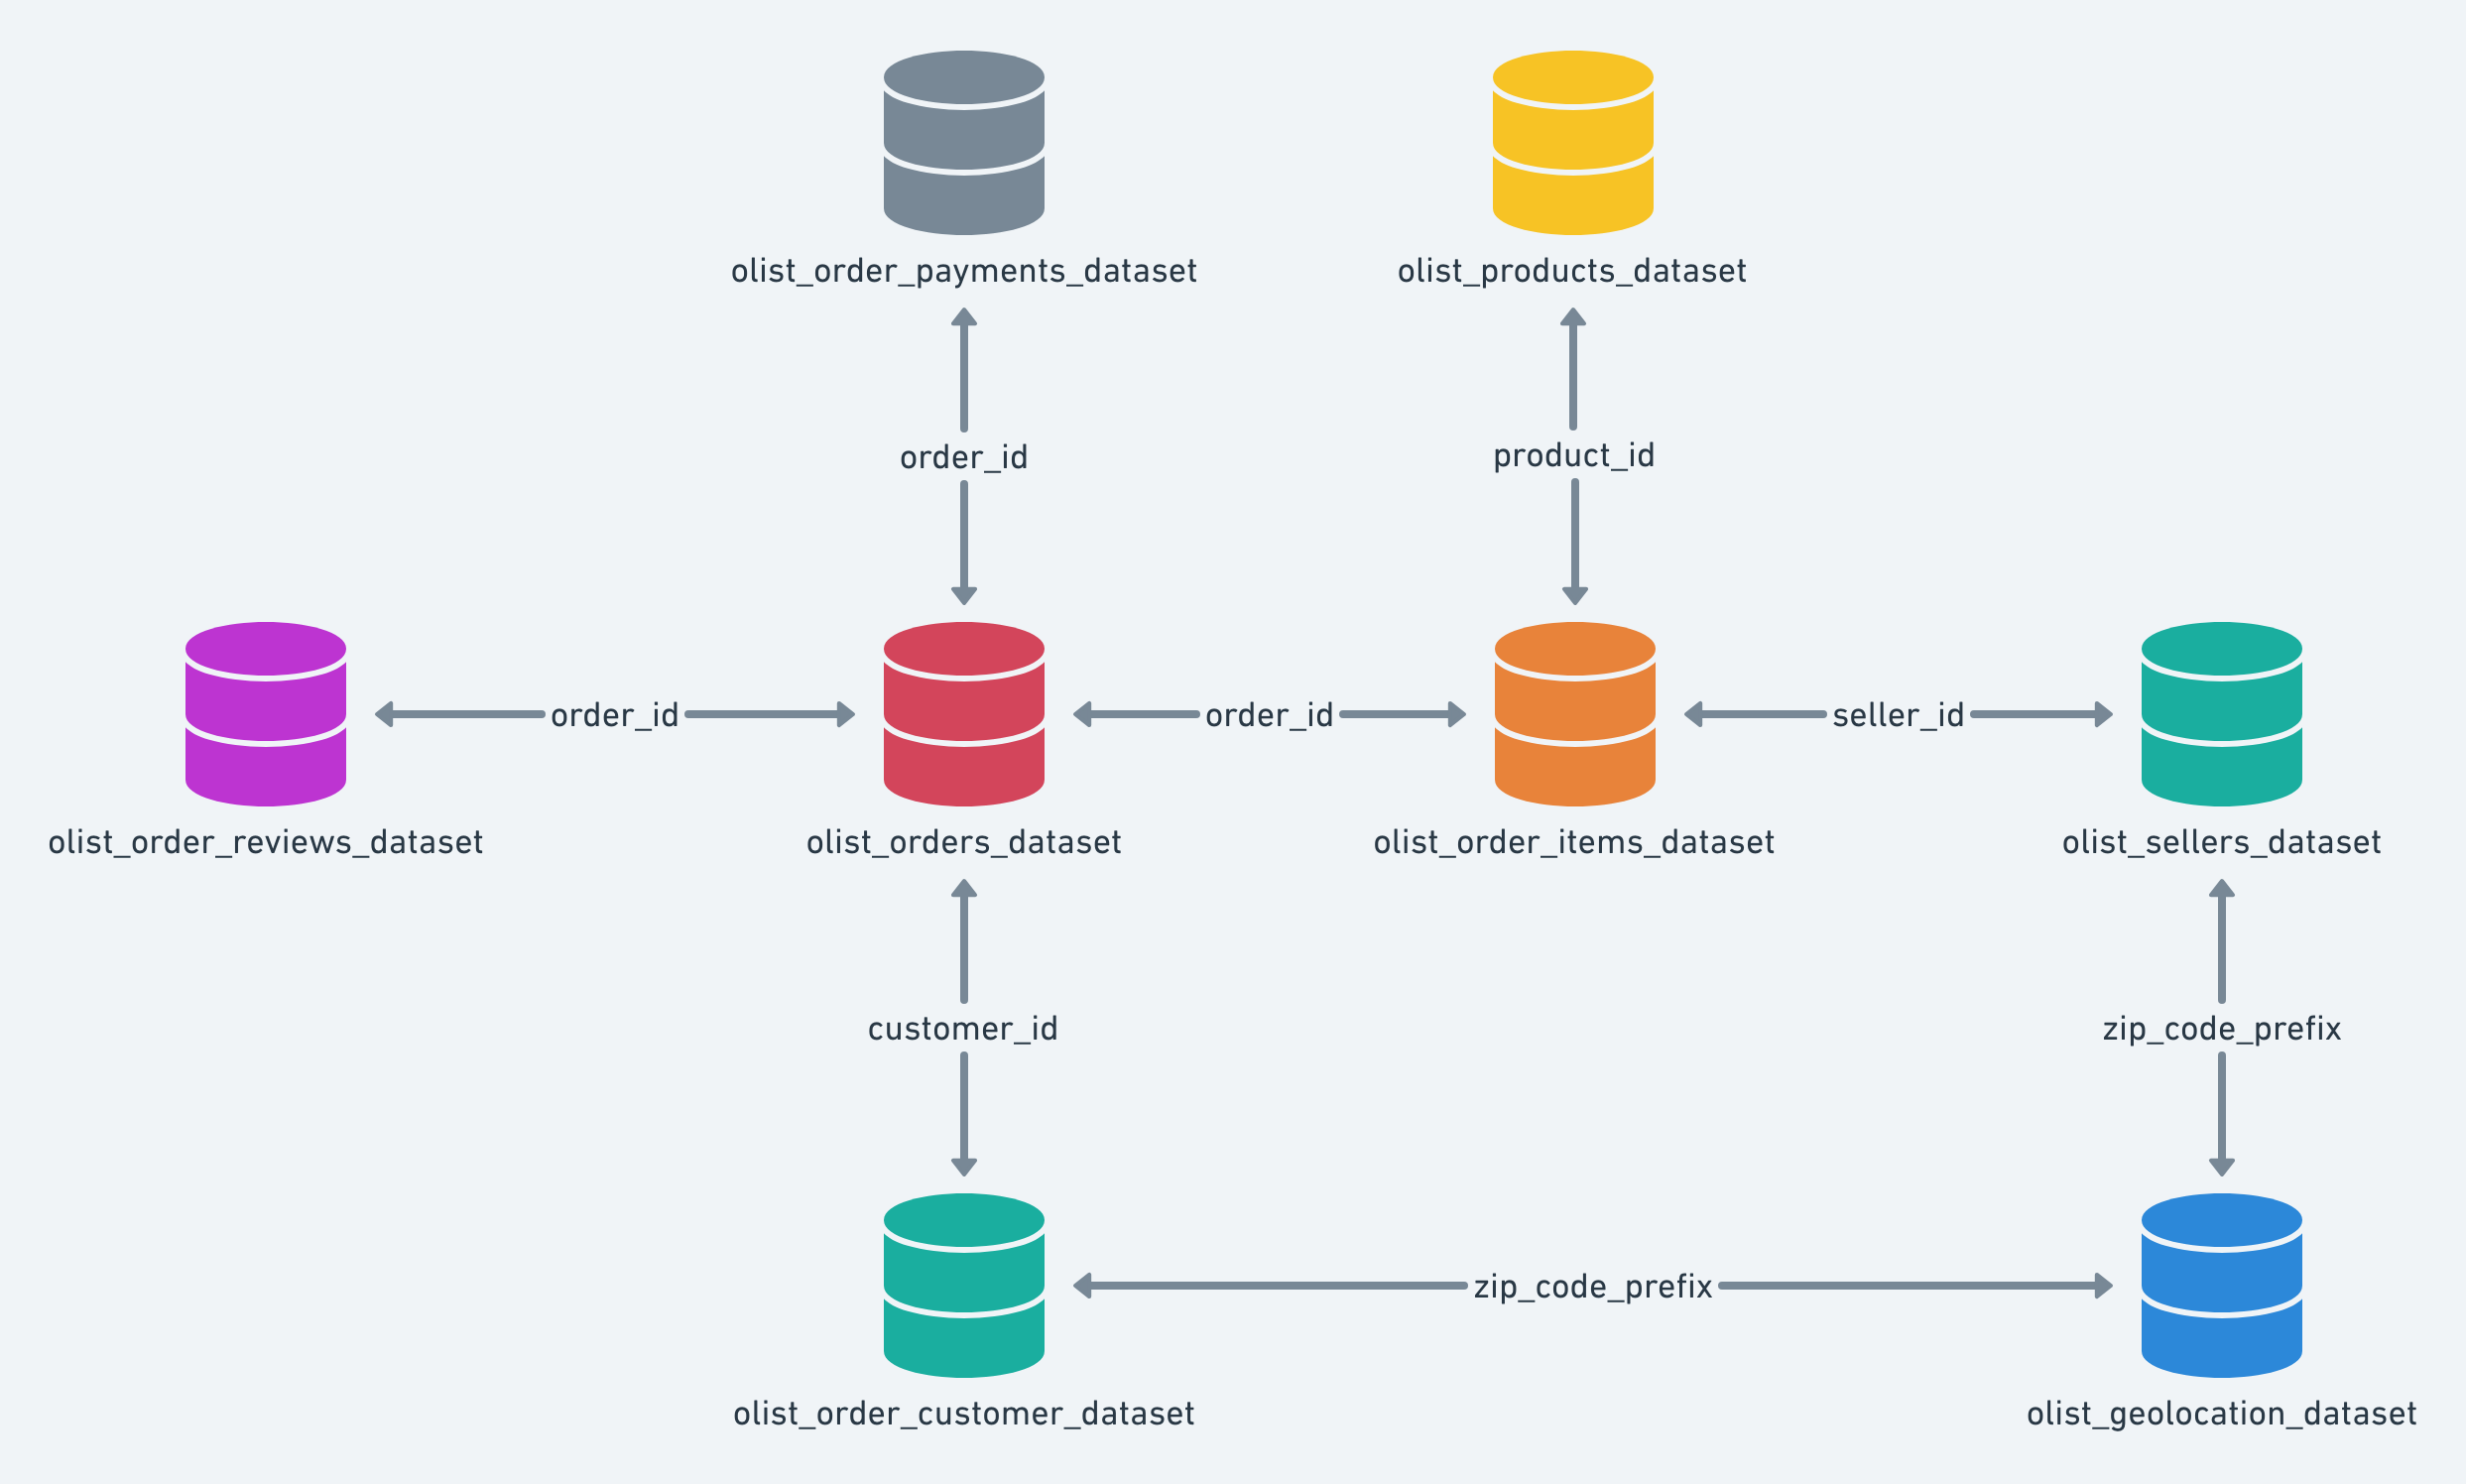






**Membuat Query Table yang dibutuhkan**

In [ ]:
#Create Table Query for olist_order_dataset
query = "SELECT * FROM olist_order_dataset"

order_dataset = pd.read_sql(query, con)
order_dataset.set_index('index',inplace = True)
order_dataset.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
index,,,,,,,,
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [ ]:
# Create Table Query for Order_Item_Dataset
query = "SELECT * FROM olist_order_items_dataset"

order_items = pd.read_sql(query, con)
order_items.drop(['index'], axis = 1, inplace = True)
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
#Create Table Query for olist_products_dataset
query = "SELECT * FROM olist_products_dataset"

product_dataset = pd.read_sql(query, con)
product_dataset.set_index('index',inplace = True)
product_dataset.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
index,,,,,,,,,
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
# Create Tabel Query for product_category_name_translation
query = "SELECT * FROM product_category_name_translation"

product_translation = pd.read_sql(query, con)
product_translation.set_index('index',inplace = True)
product_translation

,product_category_name,product_category_name_english
index,,
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene


**Pre-Processing**



*   **Cleaning Data Order_items**



In [ ]:
#Check Null Values from order_items
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [ ]:
#Check Dupilcate Data from order_items
order_items[order_items.duplicated()]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value


In [ ]:
#Check Null Values from product_dataset
product_dataset.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

*   **Cleaning Data Product_Dataset**

In [ ]:
#There's null values, but since the column no longer needed. we can drop.
product_dataset = product_dataset.drop(['product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'], axis = 1)

In [ ]:
#check duplicate data from product_dataset
product_dataset[product_dataset.duplicated()]

,product_id,product_category_name,product_name_lenght
index,,,




*   **Cleaning Data product_translation**




In [ ]:
#Check Null Values product_translation
product_translation.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [ ]:
#Check duplicated product_translation
product_translation[product_translation.duplicated()]

,product_category_name,product_category_name_english
index,,


In [ ]:
#merge order_items and product_dataset into df_order
df_order = pd.merge(order_items, product_dataset, on = 'product_id', how = 'left')
#merge df_order and product_translation and orverwrite it.
df_order = pd.merge(df_order, product_translation, on = 'product_category_name', how = 'left')
df_order.head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,cool_stuff


In [ ]:
#check Null Values from new Merging Table
df_order = df_order.drop('product_name_lenght', axis =1)
df_order.isna().sum()

KeyError: ignored

In [ ]:
#Check Null Values
df_order[['product_category_name', 'product_category_name_english']].loc[(df_order['product_category_name'].notna()) & (df_order['product_category_name_english'].isna())]

,product_category_name,product_category_name_english
3228,portateis_cozinha_e_preparadores_de_alimentos,NaN
12976,pc_gamer,NaN
12977,pc_gamer,NaN
13025,portateis_cozinha_e_preparadores_de_alimentos,NaN
18629,pc_gamer,NaN
19702,portateis_cozinha_e_preparadores_de_alimentos,NaN
31806,pc_gamer,NaN
32887,pc_gamer,NaN
36976,portateis_cozinha_e_preparadores_de_alimentos,NaN
37083,portateis_cozinha_e_preparadores_de_alimentos,NaN


In [ ]:
#Fill Null Values
map = {"pc_gamer":"pc_gamer",
         "portateis_cozinha_e_preparadores_de_alimentos":"kitchen_and_food_preparators_portables", None:"others"}

df_order["product_category_name_english"] = df_order["product_category_name_english"].fillna(df_order["product_category_name"].map(map))
df_order.isna().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name            1603
product_category_name_english       0
log_price                           0
dtype: int64

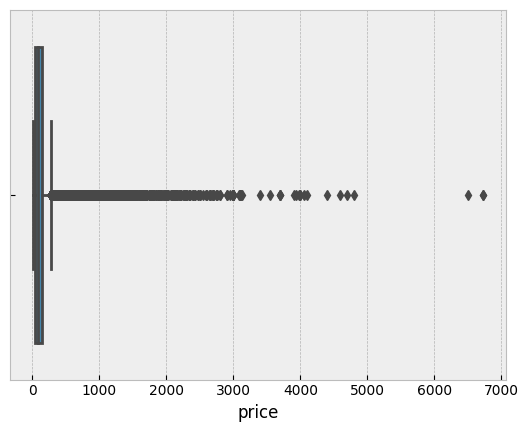

In [ ]:
#Price Data Visualitazion
sns.boxplot(df_order, x='price')
plt.show()

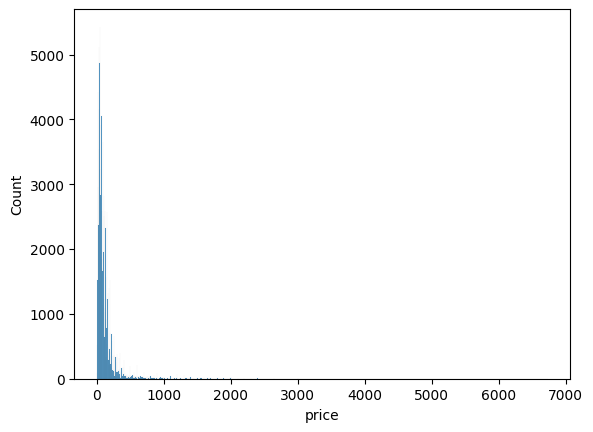

In [ ]:
#Price  Data Visualitazion
sns.histplot(df_order, x = 'price')
plt.show()

> Price data has a left-skewed distribution and will be adjusted using the logarithm

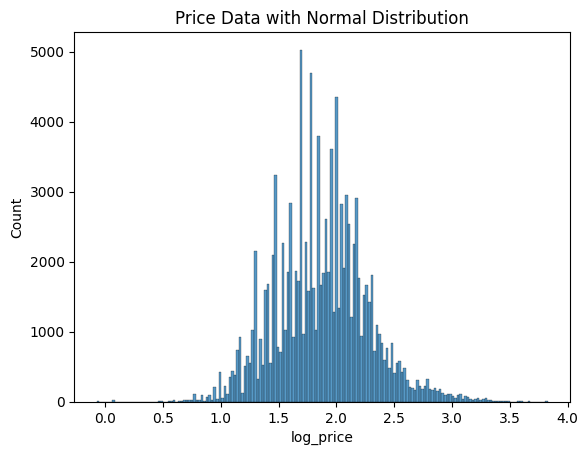

In [ ]:
#Price Transformation using Logarithm
df_order['log_price'] = np.log10(order_items['price'])
sns.histplot(data = df_order, x = 'log_price').set_title('Price Data with Normal Distribution')
plt.show()

**OBJECTIVE I : TOP 10 REVENUE by PRODUCT CATEGORY**

In [ ]:
#Summary revenue from product category
df_order_sum = df_order[['product_category_name_english', 'price']].\
            groupby('product_category_name_english').sum().\
            sort_values('price', ascending = False).reset_index()
df_order_sum10 = df_order_sum.head(10)
df_order_sum10

,product_category_name_english,price
0,health_beauty,1258681.34
1,watches_gifts,1205005.68
2,bed_bath_table,1036988.68
3,sports_leisure,988048.97
4,computers_accessories,911954.32
5,furniture_decor,729762.49
6,cool_stuff,635290.85
7,housewares,632248.66
8,auto,592720.11
9,garden_tools,485256.46


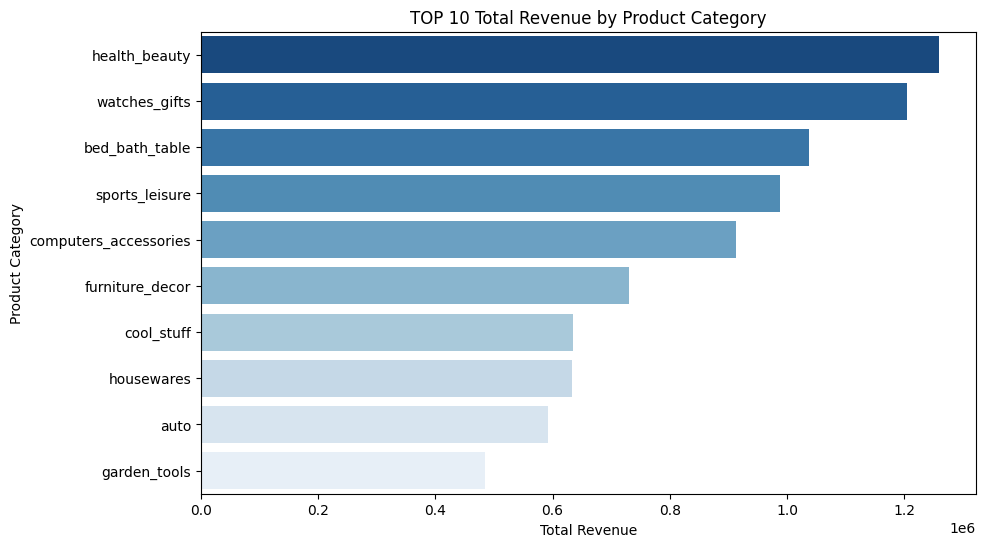

In [ ]:
#TOP 10 Revenue Visualitazion
f, ax = plt.subplots(figsize = (10,6))

sns.barplot(y = 'product_category_name_english', x = 'price', data = df_order_sum10, palette='Blues_r')
ax.set(ylabel="Product Category", xlabel="Total Revenue", title= 'TOP 10 Total Revenue by Product Category')
plt.show()

In [ ]:
df_order.head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,log_price
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,cool_stuff,1.770115


# **OBJECTIVE II : TOP 10 BEST SELL**

In [ ]:
df_order_count = df_order[["product_category_name_english", 'order_id']].groupby('product_category_name_english').count().\
sort_values('order_id', ascending = False).reset_index()
df_order_count10 = df_order_count.head(10)
df_order_count10

,product_category_name_english,order_id
0,bed_bath_table,11115
1,health_beauty,9670
2,sports_leisure,8641
3,furniture_decor,8334
4,computers_accessories,7827
5,housewares,6964
6,watches_gifts,5991
7,telephony,4545
8,garden_tools,4347
9,auto,4235


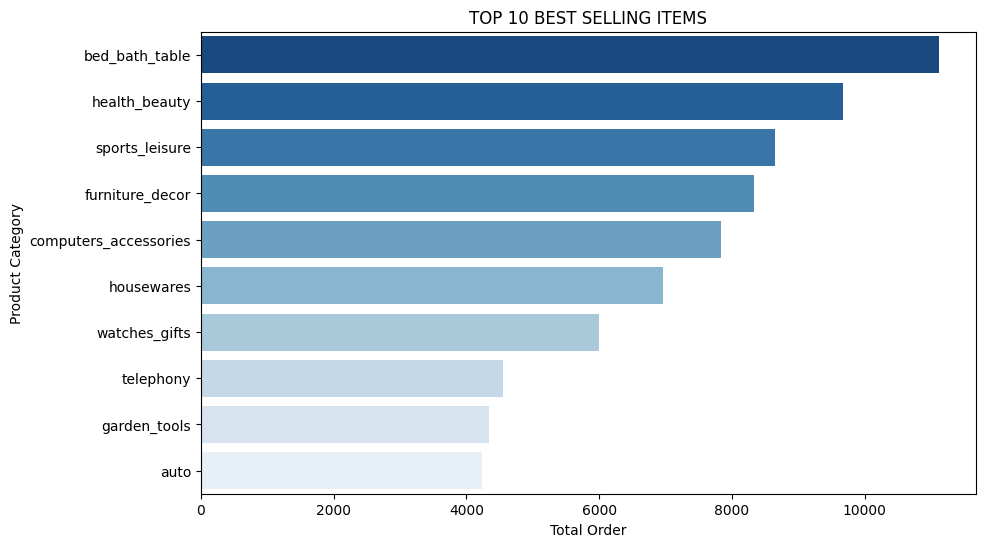

In [ ]:
f, ax = plt.subplots(figsize = (10,6))

sns.barplot(y = 'product_category_name_english', x = 'order_id', data = df_order_count10, palette='Blues_r')
ax.set(ylabel="Product Category", xlabel="Total Order", title= 'TOP 10 BEST SELLING ITEMS')
plt.show()

# **OBJECTIVE III : TOP 10 GROWTH PRODUCT in 2018**

In [ ]:
#Check Null Values from order_dataset
order_dataset.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
#Check Duplicates from order_dataset
order_dataset[order_dataset.duplicated()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
index,,,,,,,,


In [ ]:
order_dataset.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [ ]:
# Delete columns that are not needed
order_dataset = order_dataset.drop(['customer_id', 'order_status',"order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"], axis = 1)

In [ ]:
#Extract Year, Month, and Date from order_dataset
order_dataset['order_purchase_timestamp'] = pd.to_datetime(order_dataset['order_purchase_timestamp'], yearfirst = True)
order_dataset['month'] = order_dataset['order_purchase_timestamp'].dt.month
order_dataset['year'] = order_dataset['order_purchase_timestamp'].dt.year
order_dataset['days'] = order_dataset['order_purchase_timestamp'].dt.day
#Filtering data into 2018
order_dataset = order_dataset.loc[order_dataset['year'] == 2018]


In [ ]:
#Merging order_dataset and df_order
df_growth = pd.merge(df_order, order_dataset, on = 'order_id', how = 'inner')
df_growth.head(1)

df_growth_merge = pd.merge(df_order_count10[['product_category_name_english']], df_growth[['product_category_name_english', "order_item_id", "month"]], on = 'product_category_name_english', how = 'left')
df_growth_merge

,product_category_name_english,order_item_id,month
0,bed_bath_table,1,7
1,bed_bath_table,1,3
2,bed_bath_table,1,1
3,bed_bath_table,1,3
4,bed_bath_table,1,2
...,...,...,...
39766,auto,1,4
39767,auto,1,4
39768,auto,2,7
39769,auto,3,7


In [ ]:
#create pivot table
df_growth_pivot = pd.pivot_table(df_growth_merge, columns = 'product_category_name_english', index = 'month', values = 'order_item_id', aggfunc = 'sum')
df_growth_pivot


product_category_name_english,auto,bed_bath_table,computers_accessories,furniture_decor,garden_tools,health_beauty,housewares,sports_leisure,telephony,watches_gifts
month,,,,,,,,,,
1,299,1097,884,848,295,713,427,754,398,462
2,335,814,1422,569,402,763,503,730,463,370
3,367,989,976,874,375,738,542,890,369,449
4,382,963,632,815,383,807,553,693,395,550
5,325,952,563,821,398,888,892,542,274,700
6,342,946,490,526,257,1011,846,492,250,539
7,364,781,490,607,229,894,813,553,250,546
8,428,805,473,600,167,964,739,524,348,447


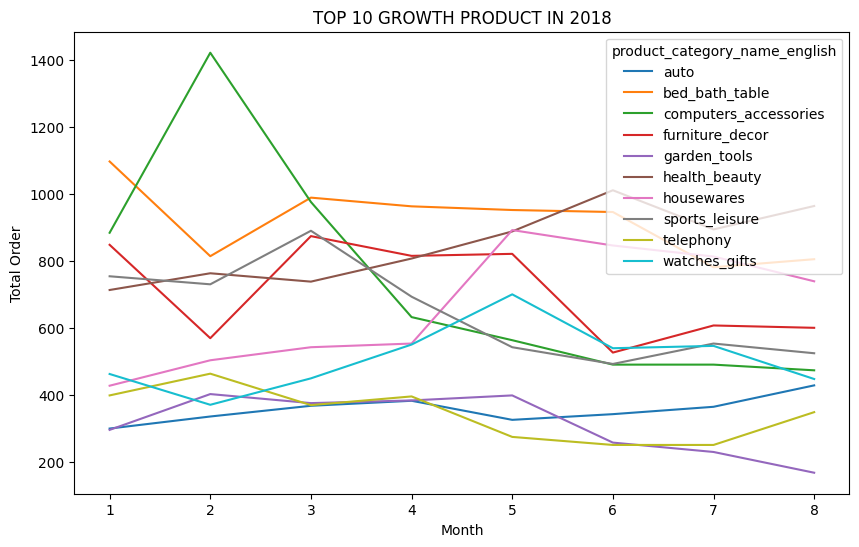

In [ ]:
#Visualization
df_growth_pivot.plot(kind='line', title = 'TOP 10 GROWTH PRODUCT IN 2018', xlabel = 'Month' , ylabel = 'Total Order', figsize = (10,6))
plt.show()

In [ ]:
order_month_2 = order_dataset.loc[order_dataset['month'] == 2]

In [ ]:
order_month_2.head(1)

,order_id,order_purchase_timestamp,month,year,days
index,,,,,
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,2,2018,13


In [ ]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   shipping_limit_date            112650 non-null  object 
 5   price                          112650 non-null  float64
 6   freight_value                  112650 non-null  float64
 7   product_category_name          111047 non-null  object 
 8   product_category_name_english  112650 non-null  object 
 9   log_price                      112650 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 9.5+ MB


In [ ]:
#Merging order_dataset and df_order
df_order_month_2 = pd.merge(df_order, order_month_2, on = 'order_id', how = 'inner')
df_order_month_2.head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,log_price,order_purchase_timestamp,month,year,days
0,0008288aa423d2a3f00fcb17cd7d8719,1,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.9,13.37,ferramentas_jardim,garden_tools,1.698101,2018-02-13 22:10:21,2,2018,13


In [ ]:
df_order_count10

,product_category_name_english,order_id
0,bed_bath_table,11115
1,health_beauty,9670
2,sports_leisure,8641
3,furniture_decor,8334
4,computers_accessories,7827
5,housewares,6964
6,watches_gifts,5991
7,telephony,4545
8,garden_tools,4347
9,auto,4235


In [ ]:
df_growth_month_2 = pd.merge(df_order_count10[['product_category_name_english']], df_order_month_2[['product_category_name_english', "order_item_id", "month", 'days']], on = 'product_category_name_english', how = 'left')
df_growth_month_2

,product_category_name_english,order_item_id,month,days
0,bed_bath_table,1,2,5
1,bed_bath_table,2,2,5
2,bed_bath_table,1,2,22
3,bed_bath_table,2,2,22
4,bed_bath_table,1,2,26
...,...,...,...,...
5130,auto,1,2,28
5131,auto,1,2,3
5132,auto,1,2,1
5133,auto,1,2,16


In [ ]:
df_month_2 = df_growth_month_2[['days', 'order_item_id']].groupby('days').count()
df_month_2

,order_item_id
days,
1,165
2,161
3,138
4,143
5,211
6,197
7,186
8,163
9,155


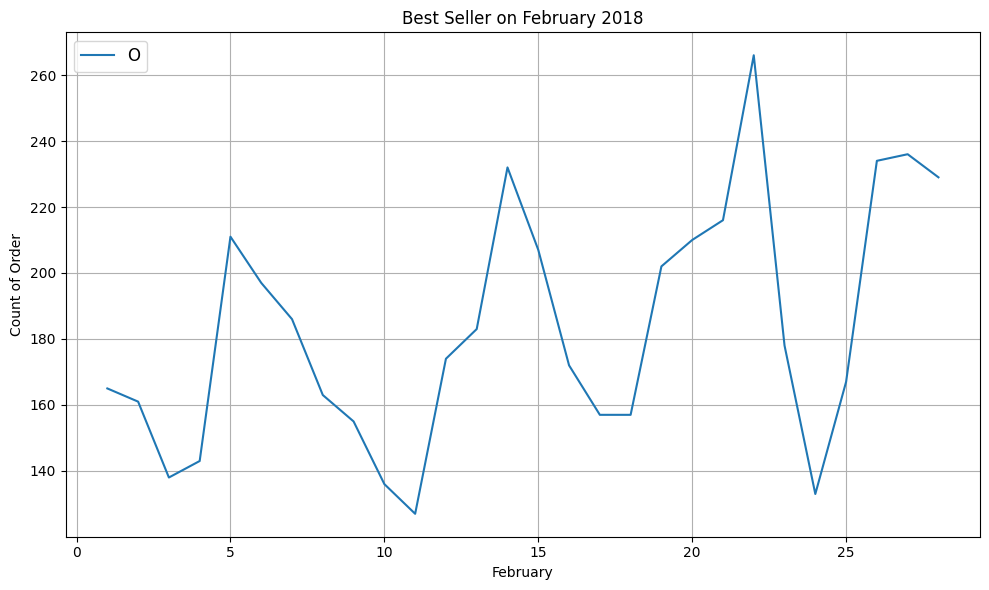

In [ ]:
ax = df_month_2.plot(figsize = (10,6))
ax.set_xlabel('February')
ax.set_ylabel('Count of Order')
plt.title('Best Seller on February 2018')
plt.legend('Order', loc='upper left', fontsize=12)
plt.tight_layout()
plt.style.use('bmh')
plt.grid(True)
plt.annotate('Highest Purchase (Month 2)', xy=(22, 12164),xytext=(266, 12164),
             arrowprops=dict(facecolor='red', shrink=0.05),
             )
plt.show()